# Kernel Ridge Regression (KRR)

Kernel Ridge Regression (KRR) is a powerful machine learning technique that combines the concepts of ridge regression and the kernel trick to handle non-linear relationships in data. It extends linear ridge regression to non-linear settings by applying kernel functions, allowing the model to learn complex patterns.

In KRR, the objective function is:

$$
\min_{\mathbf{w}} \left\{ \sum_{i=1}^{n} (y_i - \sum_{j=1}^{n} w_j k(\mathbf{x}_i, \mathbf{x}_j))^2 + \lambda \sum_{i,j=1}^{n} w_i w_j k(\mathbf{x}_i, \mathbf{x}_j) \right\}
$$

where $w_j$ are the coefficients in the kernelized space. The solution can be computed in a dual form, making it efficient for high-dimensional data.




In [1]:
# import the necessary packages
from mfbml.problems.illustrative_problems import mf_Forrester
from mfbml.methods.kernel_ridge_regression import KernelRidgeRegression
import numpy as np
import matplotlib.pyplot as plt

## Define the function and get samples

In [2]:
# define the problem
problem = mf_Forrester()
# generate the sample data
sample_x = np.linspace(0, 1, 10).reshape(-1, 1)
sample_y = problem.hf(sample_x, noise_std=0.0)

# generate the test data
test_x = np.linspace(0, 1, 100)
test_y = problem.hf(test_x, noise_std=0.0)

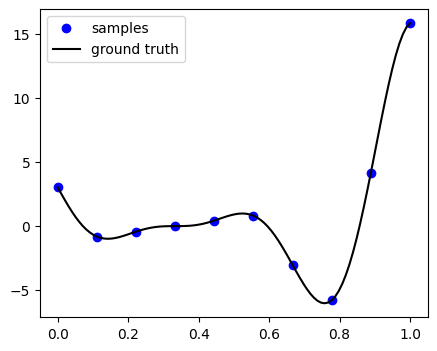

In [3]:
# plot the the data and the original function
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(sample_x, sample_y, 'bo', label='samples')
ax.plot(test_x, test_y, 'k-', label='ground truth')
plt.legend()
plt.show()

## noiseless case

In [4]:
# define the noiseless kernel ridge regression by setting noise_data=False
model = KernelRidgeRegression(design_space=problem.design_space,
                              params_optimize=True,
                              optimizer_restart=10,
                              noise_data=False,
                              )

# train the model
model.train(sample_x, sample_y)

# prediction of the test data
pred_y = model.predict(test_x.reshape(-1, 1))

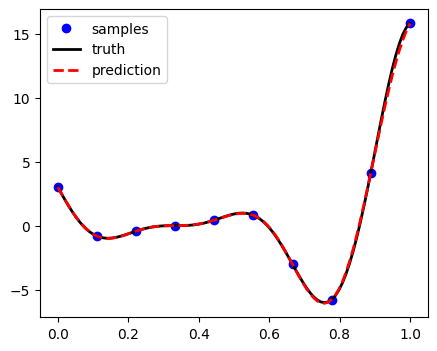

In [5]:
# plot the prediction of kernel ridge regression
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(sample_x, sample_y, 'bo', linewidth=2,  label='samples')
ax.plot(test_x, test_y, 'k-', linewidth=2, label='truth')
ax.plot(test_x, pred_y, 'r--', linewidth=2, label='prediction')
plt.legend()
plt.show()

## noisy case

In [6]:
# show case of the noisy kernel ridge regression by setting noise_data=True
sample_x_noisy = np.linspace(0, 1, 15).reshape(-1, 1)
sample_y_noisy = problem.hf(sample_x_noisy, noise_std=0.3)
model_noise = KernelRidgeRegression(design_space=problem.design_space,
                                    params_optimize=True,
                                    optimizer_restart=10,
                                    noise_data=True,
                                    )
# train the model with noisy data
model_noise.train(sample_x_noisy, sample_y_noisy)

# prediction of the test data
pred_y_noisy = model_noise.predict(test_x.reshape(-1, 1))

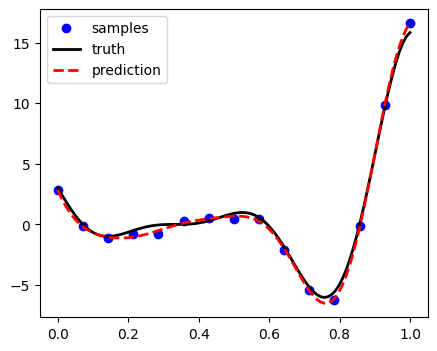

In [7]:
# plot the prediction of kernel ridge regression
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(sample_x_noisy, sample_y_noisy, 'bo', label='samples')
ax.plot(test_x, test_y, 'k-', linewidth=2, label='truth')
ax.plot(test_x, pred_y_noisy, 'r--', linewidth=2, label='prediction')
plt.legend()
plt.show()